# **LRT Key Performance Indicator**

**Author/s: Anton Reyes** 

## **Introduction**

### **Requirements and Imports**

#### **Imports**

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [165]:
import numpy as np
import pandas as pd

**Visualization Libraries**

* `matplotlib.pyplot` contains functions to create interactive plots
* `seaborn` is a library based on matplotlib that allows for data visualization
* `plotly` is an open-source graphing library for Python.

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### **Datasets and Files**

The following `csv` files were used for this project:

- `passenger_traffic.csv` contains the passengers per month (in millions)
- `peak_hour_trainsets_running.csv` contains the number of trains that run at peak hours per month.

## **Data Collection**

Importing the dataset using pandas.

In [167]:
traffic_df = pd.read_csv("datasets\passenger_traffic.csv")
peak_df = pd.read_csv("datasets\peak_hour_trainsets_running.csv")

display(traffic_df, peak_df)

,MONTH,2018,2019,2020,2021,2022,2023
0,JANUARY,5.79,5.59,3.23,0.94,1.08,3.91
1,FEBRUARY,5.44,5.05,3.08,1.00,1.42,3.86
2,MARCH,5.21,5.61,1.26,0.93,1.96,4.20
3,APRIL,4.90,4.11,0.00,0.46,1.77,NaN
4,MAY,4.97,4.84,0.00,0.81,2.35,NaN
5,JUNE,4.87,4.74,0.66,0.80,2.63,NaN
6,JULY,5.35,5.59,0.85,1.01,2.79,NaN
7,AUGUST,5.82,5.69,0.33,0.73,3.14,NaN
8,SEPTEMBER,5.57,5.94,0.72,0.93,3.32,NaN
9,OCTOBER,6.01,3.28,0.75,1.15,3.65,NaN


,MONTH,2018,2019,2020,2021,2022,2023
0,JANUARY,8,8,5,5,8,8.0
1,FEBRUARY,8,8,5,5,8,9.0
2,MARCH,8,7,5,5,8,9.0
3,APRIL,8,7,0,5,8,NaN
4,MAY,9,7,0,5,8,NaN
5,JUNE,8,7,5,5,9,NaN
6,JULY,8,7,5,6,9,NaN
7,AUGUST,8,7,5,7,9,NaN
8,SEPTEMBER,8,5,5,8,9,NaN
9,OCTOBER,8,5,5,8,9,NaN


Aside from the 13th row in both datasets, we can see that there are only values in 2023 from January to March only. We can assume that the corporation does their KPI reports on a quartely basis.

Additionally, in the months of April-May for the year 2020, there are no values as the country went into a nation-wide lockdown. But Starting June 2020, we can see the numbers begin to rise in both datasets.

## **Description of the Dataset**

Here, we find the shape of the datasets.

In [168]:
traffic_df.shape

(13, 7)

In [169]:
peak_df.shape

(13, 7)

By looking at the `info` of the dataframe, we can see that there are `non-null` values. 

However, there are null values in the year 2023 since there are no KPI reports yet, unlike in 2020 for the months of April-May, it is recorded to be `0`

In [170]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MONTH   13 non-null     object 
 1   2018    13 non-null     float64
 2   2019    13 non-null     float64
 3   2020    13 non-null     float64
 4   2021    13 non-null     float64
 5   2022    13 non-null     float64
 6   2023    4 non-null      float64
dtypes: float64(6), object(1)
memory usage: 856.0+ bytes


In [171]:
peak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MONTH   13 non-null     object 
 1   2018    13 non-null     int64  
 2   2019    13 non-null     int64  
 3   2020    13 non-null     int64  
 4   2021    13 non-null     int64  
 5   2022    13 non-null     int64  
 6   2023    4 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 856.0+ bytes


In [172]:
traffic_df.describe()

,2018,2019,2020,2021,2022,2023
count,13.000000,13.000000,13.000000,13.000000,13.000000,4.000000
mean,9.953077,8.766923,1.923846,1.821538,4.866923,5.967500
std,16.453206,14.519378,3.333321,3.026499,8.093326,3.957839
min,4.870000,3.090000,0.000000,0.460000,1.080000,3.860000
25%,5.210000,4.110000,0.660000,0.810000,1.960000,3.897500
50%,5.440000,5.050000,0.750000,0.940000,2.790000,4.055000
75%,5.790000,5.610000,1.260000,1.150000,3.650000,6.125000
max,64.700000,56.980000,12.500000,11.840000,31.640000,11.900000


In [173]:
peak_df.describe()

,2018,2019,2020,2021,2022,2023
count,13.000000,13.000000,13.000000,13.000000,13.000000,4.00
mean,8.076923,6.538462,4.153846,6.153846,8.615385,8.75
std,0.277350,1.126601,1.863963,1.281025,0.506370,0.50
min,8.000000,5.000000,0.000000,5.000000,8.000000,8.00
25%,8.000000,5.000000,5.000000,5.000000,8.000000,8.75
50%,8.000000,7.000000,5.000000,6.000000,9.000000,9.00
75%,8.000000,7.000000,5.000000,7.000000,9.000000,9.00
max,9.000000,8.000000,5.000000,8.000000,9.000000,9.00


## **Exploratory Data Analysis**

***Questions to answer:***

1. Which month has the most passenger traffic? Which has the least?
2. What is the average number of trains per month?
3. Is there a correlation between the average number of trains and the total number of traffic per year?
4. Is there a correlation between the traffic and number of train dataframes?

### **1. Which month has the most passenger traffic? Which has the least?**

***Note: This is in millions***

We first get the transposed dataframe _without_ the year 2023 so that we can get all the recorded values.

In [174]:
traffic_transposed = traffic_df[["MONTH","2018","2019","2020","2021","2022"]].T #new dataframe with select columns and transposed
traffic_transposed.columns = traffic_transposed.iloc[0]

#dropping the first row from the new dataframe
traffic_transposed = traffic_transposed.drop(traffic_transposed.index[0])
traffic_transposed = traffic_transposed.drop("TOTAL", axis=1)
traffic_transposed = traffic_transposed.apply(pd.to_numeric, errors='coerce')

By using the `.min()`, `.max()`, `.mean()` functions, we find out the corresponding values per month.

In [176]:
traffic_transposed.max()

MONTH
JANUARY      5.79
FEBRUARY     5.44
MARCH        5.61
APRIL        4.90
MAY          4.97
JUNE         4.87
JULY         5.59
AUGUST       5.82
SEPTEMBER    5.94
OCTOBER      6.01
NOVEMBER     5.47
DECEMBER     5.29
dtype: float64

In [177]:
traffic_transposed.min()

MONTH
JANUARY      0.94
FEBRUARY     1.00
MARCH        0.93
APRIL        0.00
MAY          0.00
JUNE         0.66
JULY         0.85
AUGUST       0.33
SEPTEMBER    0.72
OCTOBER      0.75
NOVEMBER     0.73
DECEMBER     0.90
dtype: float64

In [178]:
traffic_transposed.mean().round(1)

MONTH
JANUARY      3.3
FEBRUARY     3.2
MARCH        3.0
APRIL        2.2
MAY          2.6
JUNE         2.7
JULY         3.1
AUGUST       3.1
SEPTEMBER    3.3
OCTOBER      3.0
NOVEMBER     2.9
DECEMBER     3.0
dtype: float64

### **2. What is the average number of trains per month?**

Similar to the previous question, we make a new transposed dataframe with the same columns.

In [179]:
peak_transposed = peak_df[["MONTH","2018","2019","2020","2021","2022"]].T

In [180]:
peak_transposed.columns = peak_transposed.iloc[0]
peak_transposed = peak_transposed.drop(peak_transposed.index[0])
peak_transposed = peak_transposed.drop("AVERAGE", axis=1)
peak_transposed = peak_transposed.apply(pd.to_numeric, errors='coerce')

In [181]:
peak_transposed.mean().round()

MONTH
JANUARY      7.0
FEBRUARY     7.0
MARCH        7.0
APRIL        6.0
MAY          6.0
JUNE         7.0
JULY         7.0
AUGUST       7.0
SEPTEMBER    7.0
OCTOBER      7.0
NOVEMBER     7.0
DECEMBER     7.0
dtype: float64

In [182]:
peak_transposed.describe()

MONTH,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,6.800000,6.800000,6.600000,5.600000,5.800000,6.800000,7.000000,7.20000,7.000000,7.000000,7.000000,6.800000
std,1.643168,1.643168,1.516575,3.361547,3.563706,1.788854,1.581139,1.48324,1.870829,1.870829,1.870829,1.788854
min,5.000000,5.000000,5.000000,0.000000,0.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
25%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,7.00000,5.000000,5.000000,5.000000,5.000000
50%,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,8.000000,8.000000,8.000000,7.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000
max,8.000000,8.000000,8.000000,8.000000,9.000000,9.000000,9.000000,9.00000,9.000000,9.000000,9.000000,9.000000


### **3. Is there a correlation between the average number of trains and the total number of traffic per year?**

In [183]:
traffic_total = traffic_df.loc[[12]].reset_index(drop=True)
peak_average = peak_df.loc[[12]].reset_index(drop=True)

In [184]:
concat = pd.concat([traffic_total, peak_average], axis=0)

In [185]:
#drop the index column
concat = concat.reset_index(drop=True)
concat = concat.T

In [186]:
#make first rwo the column names and drop the first row
concat.columns = concat.iloc[0]
concat = concat.drop(concat.index[0])


In [209]:
#convert object to numeric
concat = concat.apply(pd.to_numeric, errors='coerce')

#rename columns
concat.columns = ["traffic_total", "peak_average"]
concat

,traffic_total,peak_average
2018,64.70,8.0
2019,56.98,7.0
2020,12.50,4.0
2021,11.84,6.0
2022,31.64,9.0
2023,11.90,9.0


<AxesSubplot:>

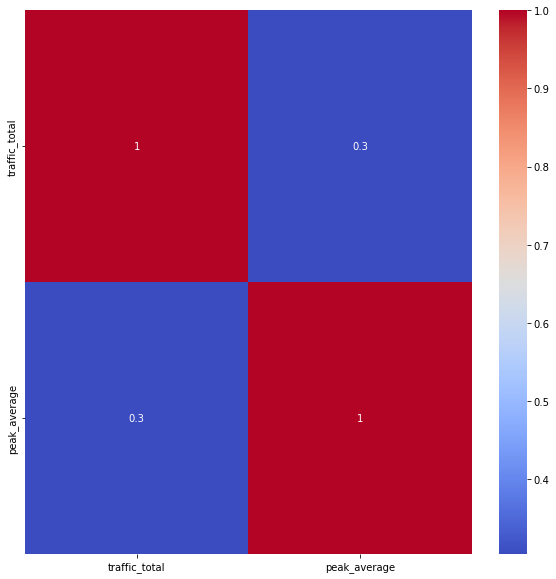

In [189]:
#heatmap correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(concat.corr(), annot=True, cmap="coolwarm")

### **4. Is there a correlation between the traffic and number of train dataframes?**

In [190]:
months = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE','JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

By using the `.corrwith` function, we check if there are any correlation in each month from the `peak_transposed` and the `traffic_tranposed` dataframes.

In [191]:
corr_df = pd.DataFrame(peak_transposed[months].corrwith(traffic_transposed[months]))

corr_df

,0
MONTH,
JANUARY,0.483678
FEBRUARY,0.521069
MARCH,0.645670
APRIL,0.733582
MAY,0.809763
JUNE,0.681796
JULY,0.570123
AUGUST,0.534495
SEPTEMBER,-0.009740


In [192]:
#adding a name to the column
corr_df.columns = ["correlation"]

#reset index for column names
corr_df = corr_df.reset_index()

In [193]:
#checking the new order of the correlation dataframe from highest to lowest correlation.
corr_df.sort_values(by="correlation", ascending=False)

,MONTH,correlation
4,MAY,0.809763
3,APRIL,0.733582
5,JUNE,0.681796
2,MARCH,0.645670
11,DECEMBER,0.642516
6,JULY,0.570123
7,AUGUST,0.534495
1,FEBRUARY,0.521069
0,JANUARY,0.483678
10,NOVEMBER,0.403151


## **Data Preprocessing**

### **Data Preprocessing**

#### **Lowercasing**

In [194]:
#lowercase column names
peak_df.columns = peak_df.columns.str.lower()
traffic_df.columns = traffic_df.columns.str.lower()

#lowercase all values in month column
peak_df["month"] = peak_df["month"].str.lower()
traffic_df["month"] = traffic_df["month"].str.lower()

In [195]:
display(peak_df.head(), traffic_df.head())

,month,2018,2019,2020,2021,2022,2023
0,january,8,8,5,5,8,8.0
1,february,8,8,5,5,8,9.0
2,march,8,7,5,5,8,9.0
3,april,8,7,0,5,8,NaN
4,may,9,7,0,5,8,NaN


,month,2018,2019,2020,2021,2022,2023
0,january,5.79,5.59,3.23,0.94,1.08,3.91
1,february,5.44,5.05,3.08,1.00,1.42,3.86
2,march,5.21,5.61,1.26,0.93,1.96,4.20
3,april,4.90,4.11,0.00,0.46,1.77,NaN
4,may,4.97,4.84,0.00,0.81,2.35,NaN


#### **Removing `total` and `average` rows**

In [196]:
# remove total and average rows
peak_df = peak_df[peak_df["month"] != "average"]
traffic_df = traffic_df[traffic_df["month"] != "total"]

In [197]:
display(peak_df.tail(), traffic_df.tail())

,month,2018,2019,2020,2021,2022,2023
7,august,8,7,5,7,9,NaN
8,september,8,5,5,8,9,NaN
9,october,8,5,5,8,9,NaN
10,november,8,5,5,8,9,NaN
11,december,8,5,5,7,9,NaN


,month,2018,2019,2020,2021,2022,2023
7,august,5.82,5.69,0.33,0.73,3.14,NaN
8,september,5.57,5.94,0.72,0.93,3.32,NaN
9,october,6.01,3.28,0.75,1.15,3.65,NaN
10,november,5.47,3.46,0.73,1.29,3.72,NaN
11,december,5.29,3.09,0.90,1.79,3.80,NaN


### **Data Cleaning**

#### **Imputing the 2023 Column for `peak_df`**

In [198]:
peak_df[["2023"]]

,2023
0,8.0
1,9.0
2,9.0
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [199]:
peak_df_imputed = peak_df.copy()

In [200]:
peak_df_imputed['2023'] = peak_df_imputed['2023'].fillna(peak_df_imputed['2023'].mean())

peak_df_imputed['2023'] = peak_df_imputed['2023'].astype('int')

In [201]:
peak_df_imputed

,month,2018,2019,2020,2021,2022,2023
0,january,8,8,5,5,8,8
1,february,8,8,5,5,8,9
2,march,8,7,5,5,8,9
3,april,8,7,0,5,8,8
4,may,9,7,0,5,8,8
5,june,8,7,5,5,9,8
6,july,8,7,5,6,9,8
7,august,8,7,5,7,9,8
8,september,8,5,5,8,9,8
9,october,8,5,5,8,9,8


#### **Imputing the 2023 Column for `traffic_df`**

In [202]:
traffic_df

,month,2018,2019,2020,2021,2022,2023
0,january,5.79,5.59,3.23,0.94,1.08,3.91
1,february,5.44,5.05,3.08,1.00,1.42,3.86
2,march,5.21,5.61,1.26,0.93,1.96,4.20
3,april,4.90,4.11,0.00,0.46,1.77,NaN
4,may,4.97,4.84,0.00,0.81,2.35,NaN
5,june,4.87,4.74,0.66,0.80,2.63,NaN
6,july,5.35,5.59,0.85,1.01,2.79,NaN
7,august,5.82,5.69,0.33,0.73,3.14,NaN
8,september,5.57,5.94,0.72,0.93,3.32,NaN
9,october,6.01,3.28,0.75,1.15,3.65,NaN


In [203]:
#traffic_df predict NaN values in 2023 column
traffic_df_imputed = traffic_df.copy()

traffic_df_imputed['2023'] = traffic_df_imputed['2023'].fillna(0)

traffic_df_imputed['2023'] = traffic_df_imputed['2023'].astype('float')

traffic_df_imputed

,month,2018,2019,2020,2021,2022,2023
0,january,5.79,5.59,3.23,0.94,1.08,3.91
1,february,5.44,5.05,3.08,1.00,1.42,3.86
2,march,5.21,5.61,1.26,0.93,1.96,4.20
3,april,4.90,4.11,0.00,0.46,1.77,0.00
4,may,4.97,4.84,0.00,0.81,2.35,0.00
5,june,4.87,4.74,0.66,0.80,2.63,0.00
6,july,5.35,5.59,0.85,1.01,2.79,0.00
7,august,5.82,5.69,0.33,0.73,3.14,0.00
8,september,5.57,5.94,0.72,0.93,3.32,0.00
9,october,6.01,3.28,0.75,1.15,3.65,0.00


In [204]:
chosen = traffic_df_imputed[["2018","2019"]]

#insert the mean values into the NaN values
traffic_df_imputed.loc[3:11, "2023"] = chosen.loc[3:11].mean(axis = 1)

traffic_df_imputed

,month,2018,2019,2020,2021,2022,2023
0,january,5.79,5.59,3.23,0.94,1.08,3.910
1,february,5.44,5.05,3.08,1.00,1.42,3.860
2,march,5.21,5.61,1.26,0.93,1.96,4.200
3,april,4.90,4.11,0.00,0.46,1.77,4.505
4,may,4.97,4.84,0.00,0.81,2.35,4.905
5,june,4.87,4.74,0.66,0.80,2.63,4.805
6,july,5.35,5.59,0.85,1.01,2.79,5.470
7,august,5.82,5.69,0.33,0.73,3.14,5.755
8,september,5.57,5.94,0.72,0.93,3.32,5.755
9,october,6.01,3.28,0.75,1.15,3.65,4.645


## **Data Visualization**

In [205]:
#get maximum value from whole dataframe
peak_max = peak_df_imputed[["2018","2019","2020","2021","2022","2023"]].max().max()
traffic_max = traffic_df_imputed[["2018","2019","2020","2021","2022","2023"]].max().max()

#get minimum value from whole dataframe
peak_min = peak_df_imputed[["2018","2019","2020","2021","2022","2023"]].min().min()
traffic_min = traffic_df_imputed[["2018","2019","2020","2021","2022","2023"]].min().min()

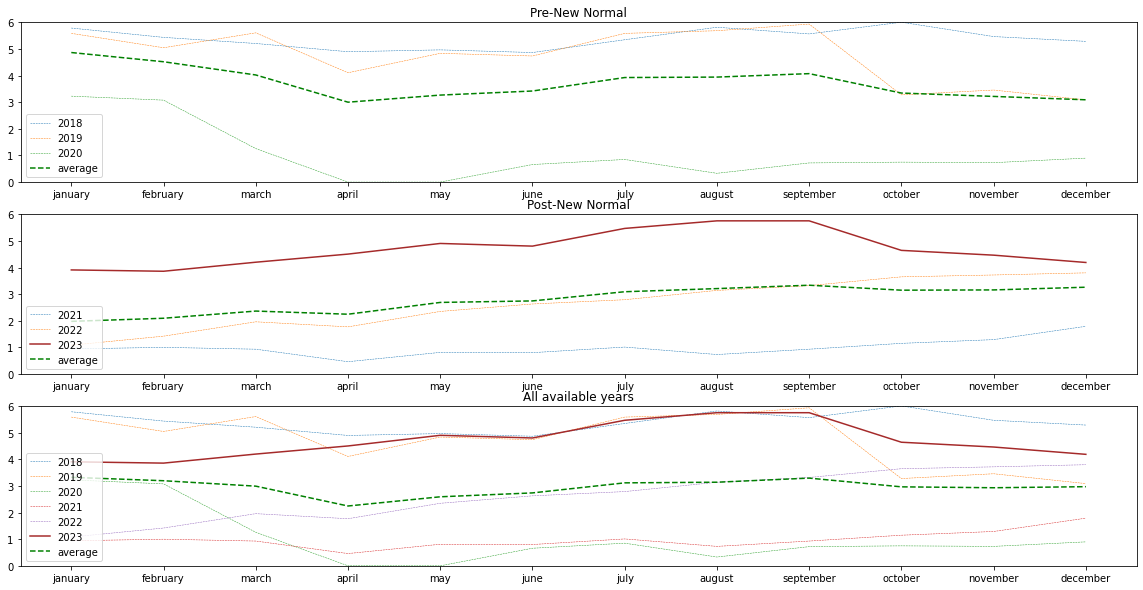

In [206]:
#subplots
fig, ax = plt.subplots(3, figsize=(20,10))

#pre-new normal

ax[0].set_title("Pre-New Normal")
ax[0].plot(traffic_df_imputed["month"], traffic_df_imputed["2018"], label="2018", linestyle="--", linewidth = 0.5)
ax[0].plot(traffic_df_imputed["month"], traffic_df_imputed["2019"], label="2019", linestyle="--", linewidth = 0.5)
ax[0].plot(traffic_df_imputed["month"], traffic_df_imputed["2020"], label="2020", linestyle="--", linewidth = 0.5)
ax[0].plot(traffic_df_imputed["month"], traffic_df_imputed[["2018","2019","2020"]].mean(axis=1), label = "average", linestyle="--", color = "green")
ax[0].set_ylim(traffic_min, traffic_max)
ax[0].legend(loc = 3)


#post-new normal

ax[1].set_title("Post-New Normal")
ax[1].plot(traffic_df_imputed["month"], traffic_df_imputed["2021"], label="2021", linestyle="--", linewidth = 0.5)
ax[1].plot(traffic_df_imputed["month"], traffic_df_imputed["2022"], label="2022", linestyle="--", linewidth = 0.5)
ax[1].plot(traffic_df_imputed["month"], traffic_df_imputed["2023"], label="2023", color = "brown")
ax[1].plot(traffic_df_imputed["month"], traffic_df_imputed[["2021","2022","2023"]].mean(axis=1), label = "average", linestyle="--", color = "green")
ax[1].set_ylim(traffic_min, traffic_max)
ax[1].legend(loc = 3)

#all years

ax[2].set_title("All available years")
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2018"], label="2018", linestyle="--", linewidth = 0.5)
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2019"], label="2019", linestyle="--", linewidth = 0.5)
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2020"], label="2020", linestyle="--", linewidth = 0.5)
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2021"], label="2021", linestyle="--", linewidth = 0.5)
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2022"], label="2022", linestyle="--", linewidth = 0.5)
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed["2023"], label="2023", color = "brown")
ax[2].plot(traffic_df_imputed["month"], traffic_df_imputed[["2018","2019","2020","2021","2022"]].mean(axis=1), label = "average", linestyle="--", color = "green")
ax[2].set_ylim(traffic_min, traffic_max)
ax[2].legend(loc = 3)


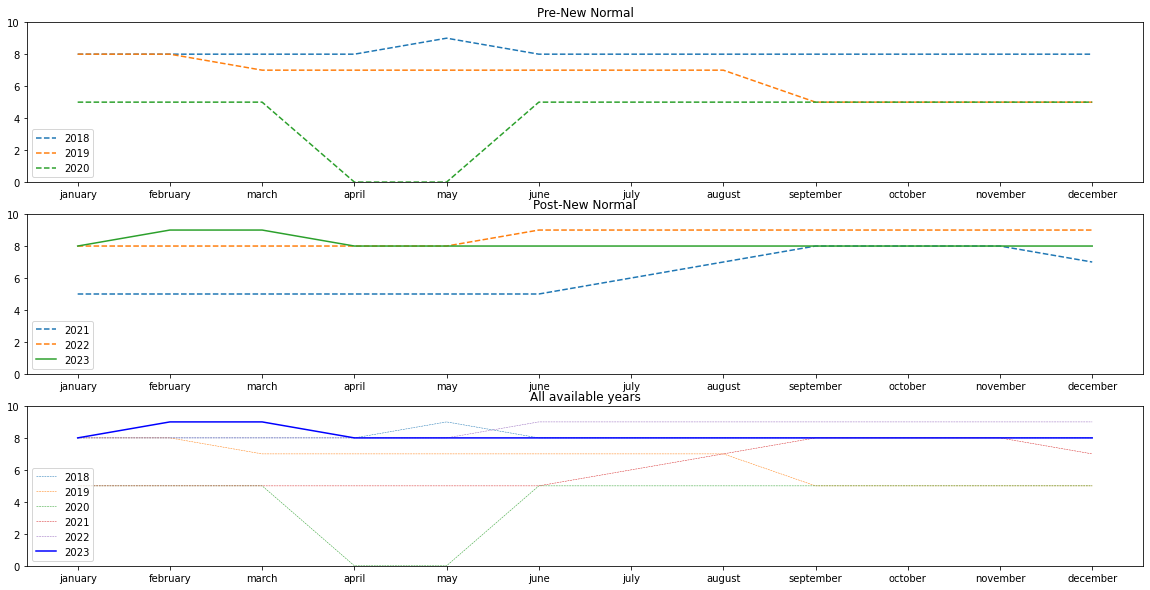

In [207]:
#subplots
fig, ax = plt.subplots(3, figsize=(20,10))

#pre-new normal

ax[0].set_title("Pre-New Normal")
ax[0].plot(peak_df_imputed["month"], peak_df_imputed["2018"], label="2018", linestyle="--")
ax[0].plot(peak_df_imputed["month"], peak_df_imputed["2019"], label="2019", linestyle="--")
ax[0].plot(peak_df_imputed["month"], peak_df_imputed["2020"], label="2020", linestyle="--")
ax[0].set_ylim(peak_min, peak_max + 1)
ax[0].legend(loc = 3)


#post-new normal

ax[1].set_title("Post-New Normal")
ax[1].plot(peak_df_imputed["month"], peak_df_imputed["2021"], label="2021", linestyle="--")
ax[1].plot(peak_df_imputed["month"], peak_df_imputed["2022"], label="2022", linestyle="--")
ax[1].plot(peak_df_imputed["month"], peak_df_imputed["2023"], label="2023", )
ax[1].set_ylim(peak_min, peak_max + 1)
ax[1].legend(loc = 3)

#all years

ax[2].set_title("All available years")
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2018"], label="2018", linestyle="--", linewidth = 0.5)
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2019"], label="2019", linestyle="--", linewidth = 0.5)
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2020"], label="2020", linestyle="--", linewidth = 0.5)
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2021"], label="2021", linestyle="--", linewidth = 0.5)
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2022"], label="2022", linestyle="--", linewidth = 0.5)
ax[2].plot(peak_df_imputed["month"], peak_df_imputed["2023"], label="2023", color = "blue")
ax[2].set_ylim(peak_min, peak_max + 1)
ax[2].legend(loc = 3)


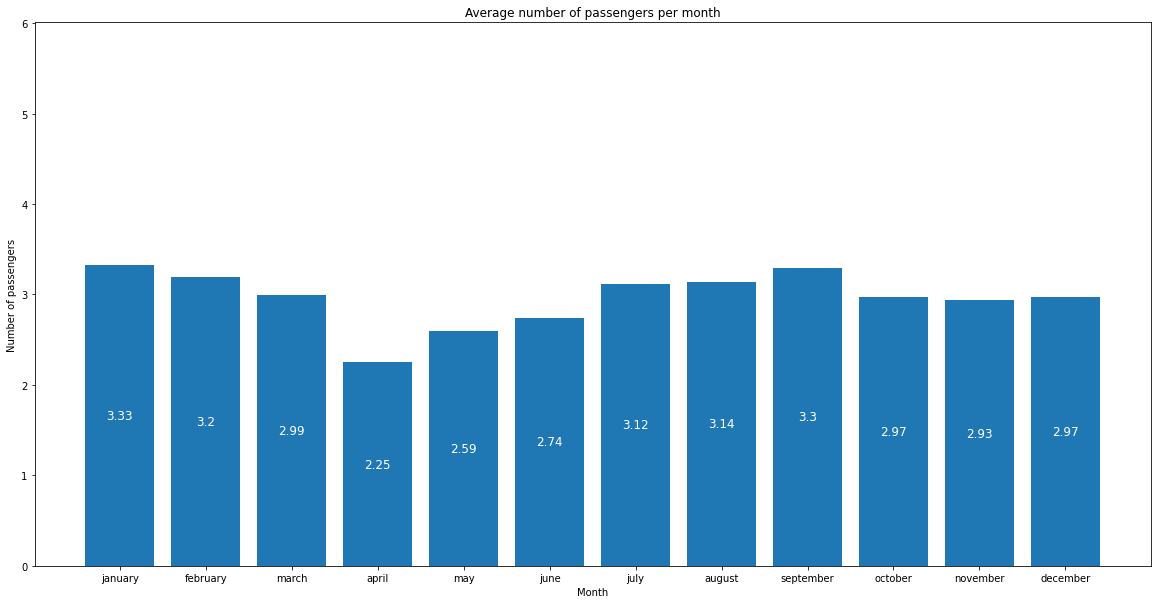

In [208]:
#barchart with average per month
fig, ax = plt.subplots(1, figsize=(20,10))

ax.set_title("Average number of passengers per month")
ax.bar(traffic_df_imputed["month"], traffic_df_imputed[["2018","2019","2020","2021","2022"]].mean(axis=1))
ax.set_ylim(traffic_min, traffic_max)
ax.set_ylabel("Number of passengers")
ax.set_xlabel("Month")

#annotate the average value on the bar and put it in the center
for i, v in enumerate(traffic_df_imputed[["2018","2019","2020","2021","2022"]].mean(axis=1)):
    ax.text(i, v/2, str(round(v, 2)), ha="center", va="center", color="white", fontsize=12)
